### Create a model to predict a curreny note is authentic or not 

In [1]:
## Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('datasets/datasets/bill_authentication.csv')

In [4]:
df.shape

(1372, 5)

In [5]:
df.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [9]:
pd.unique(df['Class'])

array([0, 1], dtype=int64)

In [12]:
x=df.drop('Class',axis=1)
x.head()

,Variance,Skewness,Curtosis,Entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


In [13]:
y=df['Class']

In [14]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variance  1372 non-null   float64
 1   Skewness  1372 non-null   float64
 2   Curtosis  1372 non-null   float64
 3   Entropy   1372 non-null   float64
 4   Class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


<AxesSubplot:>

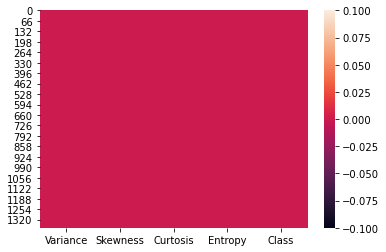

In [17]:
sns.heatmap(pd.isnull(df))

In [18]:
df.describe()

,Variance,Skewness,Curtosis,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


Class
0    [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
1    [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
dtype: object

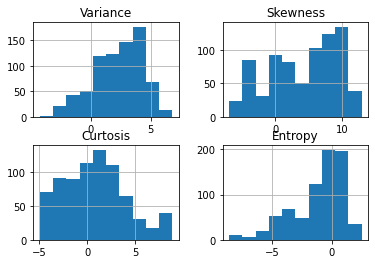

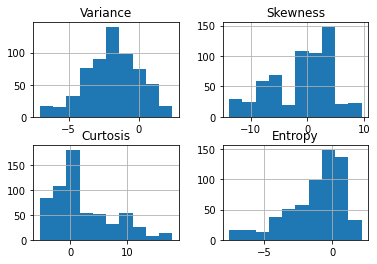

In [19]:
df.groupby('Class').hist()

C:\Users\Hrishikesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

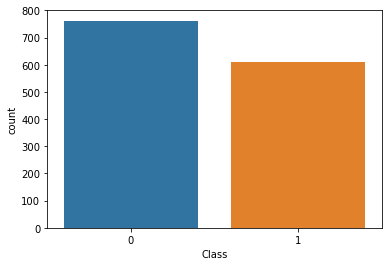

In [20]:
sns.countplot(df['Class'])

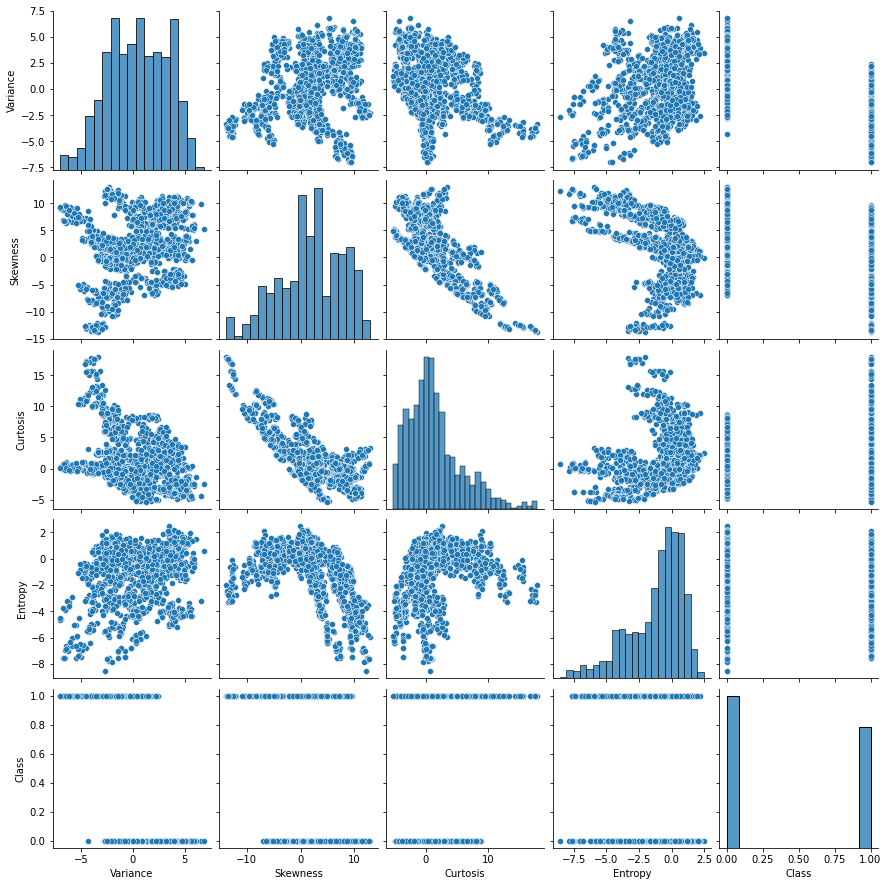

In [21]:
sns.pairplot(df)

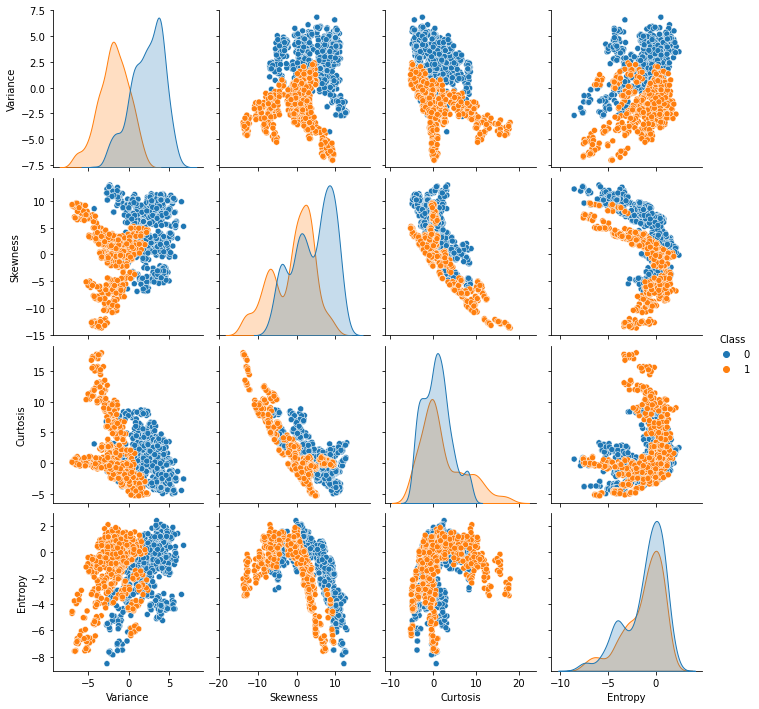

In [23]:
sns.pairplot(df,hue='Class')

C:\Users\Hrishikesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Skewness'>

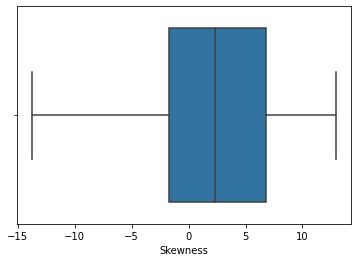

In [25]:
sns.boxplot(df['Skewness'])

In [37]:
## Splitting the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=0)

In [38]:
##Model Creation
from sklearn.svm import SVC
model=SVC(kernel='linear',probability=True)
model.fit(x_train,y_train)

SVC(kernel='linear', probability=True)

In [39]:
##Mkake prediction
y_pred=model.predict(x_test)
y_pred[0:6]

array([1, 0, 1, 0, 0, 0], dtype=int64)

In [43]:
model.support_vectors_

array([[ 3.29200e-01, -4.45520e+00,  4.57180e+00, -9.88800e-01],
       [ 3.29200e-01, -4.45520e+00,  4.57180e+00, -9.88800e-01],
       [ 5.19500e-01, -3.26330e+00,  3.08950e+00, -9.84900e-01],
       [-1.85840e+00,  7.88600e+00, -1.66430e+00, -1.83840e+00],
       [ 5.19500e-01, -3.26330e+00,  3.08950e+00, -9.84900e-01],
       [ 3.79840e-01,  7.09750e-01,  7.57160e-01, -4.44410e-01],
       [ 5.19500e-01, -3.26330e+00,  3.08950e+00, -9.84900e-01],
       [ 3.29200e-01, -4.45520e+00,  4.57180e+00, -9.88800e-01],
       [ 5.70600e-01, -2.48410e-02,  1.24210e+00, -5.62080e-01],
       [-1.85840e+00,  7.88600e+00, -1.66430e+00, -1.83840e+00],
       [ 5.70600e-01, -2.48000e-02,  1.24210e+00, -5.62100e-01],
       [ 3.29200e-01, -4.45520e+00,  4.57180e+00, -9.88800e-01],
       [ 5.19470e-01, -3.26330e+00,  3.08950e+00, -9.84920e-01],
       [ 3.79800e-01,  7.09800e-01,  7.57200e-01, -4.44400e-01],
       [ 5.70600e-01, -2.48000e-02,  1.24210e+00, -5.62100e-01],
       [ 3.79800e-01,  7.

In [41]:
model.score(x_test,y_test)

0.9927272727272727

In [40]:
model.score(x_train,y_train)

0.9881494986326345

In [45]:
len(model.support_vectors_)

38

In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       157
           1       0.98      1.00      0.99       118

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



In [47]:
model.predict(x_test)[0]

1

In [48]:
model.predict([[3.2,7.6,-.7,4]])

array([0], dtype=int64)

In [49]:
###ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [59]:
def plot_roc_curve(fpr,tpr):
    plt.plot(fpr,tpr,color='red')
    plt.plot([0,1],[0,1],color='blue',linestyle='--')
    plt.xlabel('false positive rate')
    plt.ylabel=('true positive rate')
    plt.show()

In [60]:
model.predict(x_test)

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1], dtype=int64)

In [61]:
prob=model.predict_proba(x_test)
prob

array([[2.04196744e-06, 9.99997958e-01],
       [9.99999807e-01, 1.92739493e-07],
       [2.97401320e-08, 9.99999970e-01],
       [9.99999900e-01, 1.00000010e-07],
       [9.99999900e-01, 1.00000010e-07],
       [9.99998584e-01, 1.41561739e-06],
       [9.99999900e-01, 1.00000010e-07],
       [9.99999375e-01, 6.24809847e-07],
       [1.15570810e-05, 9.99988443e-01],
       [3.10113514e-03, 9.96898865e-01],
       [9.99999392e-01, 6.07684004e-07],
       [9.99999900e-01, 1.00000010e-07],
       [8.28819479e-08, 9.99999917e-01],
       [9.99999900e-01, 1.00000010e-07],
       [9.99999900e-01, 1.00000010e-07],
       [9.99999900e-01, 1.00000010e-07],
       [4.29026824e-12, 1.00000000e+00],
       [3.81678813e-06, 9.99996183e-01],
       [9.99999900e-01, 1.00000010e-07],
       [9.99999900e-01, 1.00000010e-07],
       [1.06390226e-02, 9.89360977e-01],
       [9.99325485e-01, 6.74514792e-04],
       [9.99999900e-01, 1.00000010e-07],
       [3.44094476e-03, 9.96559055e-01],
       [9.185636

In [62]:
prob =prob[:, 1]
prob

array([9.99997958e-01, 1.92739493e-07, 9.99999970e-01, 1.00000010e-07,
       1.00000010e-07, 1.41561739e-06, 1.00000010e-07, 6.24809847e-07,
       9.99988443e-01, 9.96898865e-01, 6.07684004e-07, 1.00000010e-07,
       9.99999917e-01, 1.00000010e-07, 1.00000010e-07, 1.00000010e-07,
       1.00000000e+00, 9.99996183e-01, 1.00000010e-07, 1.00000010e-07,
       9.89360977e-01, 6.74514792e-04, 1.00000010e-07, 9.96559055e-01,
       8.14363919e-02, 9.96811317e-01, 1.00000010e-07, 9.99999825e-01,
       7.71973142e-04, 2.46233451e-06, 9.95371991e-01, 4.25561169e-02,
       9.53569981e-01, 9.99999998e-01, 9.99999996e-01, 5.04361556e-07,
       4.05070126e-07, 9.99998508e-01, 1.88992342e-05, 9.99999963e-01,
       7.68434709e-01, 9.99999998e-01, 1.00000010e-07, 4.29005615e-05,
       9.99998091e-01, 9.87901195e-01, 1.00000010e-07, 4.02265470e-07,
       9.99999998e-01, 2.91974567e-06, 1.00000010e-07, 1.00000000e+00,
       4.19660243e-06, 9.99999972e-01, 9.92911679e-01, 1.00000010e-07,
      

In [63]:
auc=roc_auc_score(y_test,prob)
auc

0.9998920436143798

In [64]:
fpr,tpr,threshold= roc_curve(y_test,prob)

In [65]:
fpr

array([0.        , 0.        , 0.        , 0.00636943, 0.00636943,
       0.01910828, 0.03184713, 0.56050955, 1.        ])

In [66]:
tpr

array([0.        , 0.00847458, 0.98305085, 0.98305085, 1.        ,
       1.        , 1.        , 1.        , 1.        ])

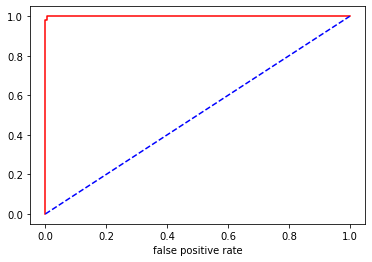

In [67]:
plot_roc_curve(fpr, tpr)